In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette()
from sklearn.metrics.pairwise import euclidean_distances as euc_dist
from eval_ds import *
from embed_evals import get_NI, get_NINO, get_NIFO
%config InlineBackend.figure_format='retina'

/data/anaconda3/envs/hanliu-tutorial/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# from torchvision.datasets import ImageFolder
# train_ds = ImageFolder('../datasets/bm/train')
# valid_ds = ImageFolder('../datasets/bm/valid')
# test_ds = ImageFolder('../datasets/bm/test')
# y_train = np.array([y for _, y in train_ds])
# y_valid = np.array([y for _, y in valid_ds])
# y_test = np.array([y for _, y in test_ds])
# ytvs = y_train, y_valid, y_test
y_train, y_valid, y_test = pickle.load(open('../datasets/bm/labels.pkl', 'rb'))

In [100]:
PAPER = True
if PAPER:
    m_seed = 4
    m_path = '../embeds/bm/prolific/bm_filtered_d50_e50/pre_no_aug_3/MTL0.5/'
    m_train = pickle.load(open(m_path + f'MTL_han_train_emb50_s{m_seed}.pkl', 'rb'))
    m_test = pickle.load(open(m_path + f'MTL_han_test_emb50_s{m_seed}.pkl', 'rb'))
else:
    m_seed = 4
    m_path = '../embeds/bm/prolific/bm_prolific_d50_e50/pre_no_aug_0/MTL0.8/'
    m_train = pickle.load(open(m_path + f'MTL_han_train_emb50_s{m_seed}.pkl', 'rb'))
    m_test = pickle.load(open(m_path + f'MTL_han_test_emb50_s{m_seed}.pkl', 'rb'))

In [101]:
if PAPER:
    r_seed = 4
    r_path = '../embeds/bm/prolific/bm_prolific_d512_e50/pre_no_aug_0/MTL1/'
    r_train = pickle.load(open(r_path + f'MTL_han_train_emb512_s{r_seed}.pkl', 'rb'))
    r_test = pickle.load(open(r_path + f'MTL_han_test_emb512_s{r_seed}.pkl', 'rb'))
else:
    r_seed = 2
    r_path = '../embeds/bm/prolific/bm_prolific_d50_e50/pre_no_aug_0/MTL1/'
    r_train = pickle.load(open(r_path + f'MTL_han_train_emb50_s{r_seed}.pkl', 'rb'))
    r_test = pickle.load(open(r_path + f'MTL_han_test_emb50_s{r_seed}.pkl', 'rb'))

In [102]:
# t_seed = 0
# t_path = '../embeds/bm/prolific/bm_prolific_d512_e50/pre_no_aug_0/MTL0/'
# t_train = pickle.load(open(t_path + f'MTL_han_train_emb512_s{t_seed}.pkl', 'rb'))
# t_test = pickle.load(open(t_path + f'MTL_han_test_emb512_s{t_seed}.pkl', 'rb'))

t_seed = 0
t_path = '../embeds/bm/prolific/bm_prolific_d50_e50/pre_no_aug_0/MTL0/'
t_train = pickle.load(open(t_path + f'MTL_han_train_emb50_s{t_seed}.pkl', 'rb'))
t_test = pickle.load(open(t_path + f'MTL_han_test_emb50_s{t_seed}.pkl', 'rb'))

In [103]:
syn = euc_dist(t_test, t_train)
mdst = euc_dist(m_test, m_train)
rdst = euc_dist(r_test, r_train)

In [104]:
m_nis = get_NI(mdst, y_train, y_test)
r_nis = get_NI(rdst, y_train, y_test)
m_nos = get_NI(mdst, 1-y_train, y_test)
r_nos = get_NI(rdst, 1-y_train, y_test)

In [105]:
m_fis = get_NI(-mdst, y_train, y_test)
r_fis = get_NI(-rdst, y_train, y_test)
m_fos = get_NI(-mdst, 1-y_train, y_test)
r_fos = get_NI(-rdst, 1-y_train, y_test)

In [106]:
nn_mat = np.hstack([np.arange(len(y_test)).reshape(-1, 1), m_nis, r_nis])
sames = np.where(nn_mat[:, 1] == nn_mat[:, 2])[0]
corr = (get_ds_choice(syn, nn_mat) == 0).astype(float)
corr[sames] = 0.5
sames, corr.mean()

(array([ 8, 26]), 0.7)

In [107]:
sdtt = euc_dist(t_train, t_train)
r_nino = np.take_along_axis(sdtt.take(r_nis.ravel(), 0), r_nos, 1)
m_nino = np.take_along_axis(sdtt.take(m_nis.ravel(), 0), m_nos, 1)
r_nifo = np.take_along_axis(sdtt.take(r_nis.ravel(), 0), r_fos, 1)
m_nifo = np.take_along_axis(sdtt.take(m_nis.ravel(), 0), m_fos, 1)
r_nino.mean(), m_nino.mean(), r_nifo.mean(), m_nifo.mean()

(10.222828, 7.574791, 9.886739, 10.86381)

In [108]:
rm_ni = np.take_along_axis(sdtt.take(r_nis.ravel(), 0), m_nis, 1)
rm_no = np.take_along_axis(sdtt.take(r_nos.ravel(), 0), m_nos, 1)
rm_fo = np.take_along_axis(sdtt.take(r_fos.ravel(), 0), m_fos, 1)
rm_ni.mean(), rm_no.mean(), rm_fo.mean()

(6.5248337, 8.627111, 9.106236)

In [109]:
rni_mno = np.take_along_axis(sdtt.take(r_nis.ravel(), 0), m_nos, 1)
mni_rno = np.take_along_axis(sdtt.take(m_nis.ravel(), 0), r_nos, 1)
rni_mfo = np.take_along_axis(sdtt.take(r_nis.ravel(), 0), m_fos, 1)
mni_rfo = np.take_along_axis(sdtt.take(m_nis.ravel(), 0), r_fos, 1)
rni_mno.mean(), mni_rno.mean(), rni_mfo.mean(), mni_rfo.mean()

(8.307442, 10.142217, 10.813764, 9.258926)

In [110]:
dfn = pd.DataFrame(np.array([np.take_along_axis(syn, r_nis, 1).mean(), np.take_along_axis(syn, r_nos, 1).mean(), np.take_along_axis(syn, m_nis, 1).mean(), np.take_along_axis(syn, m_nos, 1).mean()]).reshape(2,-1), index=['RESN', 'MTL'], columns=['T-NI', 'T-NO'])
dff = pd.DataFrame(np.array([np.take_along_axis(syn, r_fis, 1).mean(), np.take_along_axis(syn, r_fos, 1).mean(), np.take_along_axis(syn, m_fis, 1).mean(), np.take_along_axis(syn, m_fos, 1).mean()]).reshape(2,-1), index=['RESN', 'MTL'], columns=['T-FI', 'T-FO'])
df_rm = dfn.copy()
df_rm[dff.columns] = dff
df_rm['NI-NO'] = r_nino.mean(), m_nino.mean()
df_rm['NI-FO'] = r_nifo.mean(), m_nifo.mean()
df_rm['RNI-MNI'] = rm_ni.mean().repeat(2)
df_rm['RNO-MNO'] = rm_no.mean().repeat(2)
df_rm['RFO-MFO'] = rm_fo.mean().repeat(2)
df_rm['RNI-MNO'] = rni_mno.mean().repeat(2)
df_rm['MNI-RNO'] = mni_rno.mean().repeat(2)
df_rm['RNI-MFO'] = rni_mfo.mean().repeat(2)
df_rm['MNI-RFO'] = mni_rfo.mean().repeat(2)
df_rm.applymap("{:.2f}".format)

,T-NI,T-NO,T-FI,T-FO,NI-NO,NI-FO,RNI-MNI,RNO-MNO,RFO-MFO,RNI-MNO,MNI-RNO,RNI-MFO,MNI-RFO
RESN,5.58,8.81,8.21,8.51,10.22,9.89,6.52,8.63,9.11,8.31,10.14,10.81,9.26
MTL,5.00,6.66,9.30,9.65,7.57,10.86,6.52,8.63,9.11,8.31,10.14,10.81,9.26


In [89]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42)
t_ts = tsne.fit_transform(np.vstack([t_train, t_test]))

In [90]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42, max_iter=1e5)
svc.fit(t_ts[:len(t_train)], y_train)
svc.score(t_ts[:len(t_train)], y_train), svc.score(t_ts[len(t_train):], y_test)
# svc.fit(t_ts, np.hstack([y_train, y_test]))
# svc.score(t_ts[:len(t_train)], y_train), svc.score(t_ts[len(t_train):], y_test)

(0.9416666666666667, 0.975)

In [91]:
def plot_line(ax, xlim, ws, b):
    xlin = np.linspace(*xlim)
    xlin = xlin[len(xlin)//18:][:-len(xlin)//18]
    ws = ws / ws[1]
    ylin = xlin * np.tan(-ws[0]) + b
    return ax.plot(xlin, ylin, color='k')

In [92]:
rms = np.vstack([r_nis, r_nos, r_fos, m_nis, m_nos, m_fos]).ravel()
t_rms = t_ts.take(rms, 0)
t_s2d = t_ts.take(np.arange(40)+len(t_train), 0)
trm_2d = np.vstack([t_rms, t_s2d])

In [93]:
df_trm = pd.DataFrame(trm_2d, columns=['x1', 'x2'])
df_trm['model'] = np.hstack([np.array(['RESN', 'MTL']).repeat(40 * 3), np.array('test').repeat(40)])
df_trm['support'] = np.hstack([np.array(['NI', 'NO', 'FO']).repeat(2).reshape(3,-1).T.ravel().repeat(40), np.array('test').repeat(40)])
df_trm['test_id'] = np.tile(np.arange(40), 7)
df_trm['label'] = np.hstack([y_train.take(rms), y_test])
df_trm['fold'] = np.array(['train', 'test']).repeat((len(y_test)*6, len(y_test)))

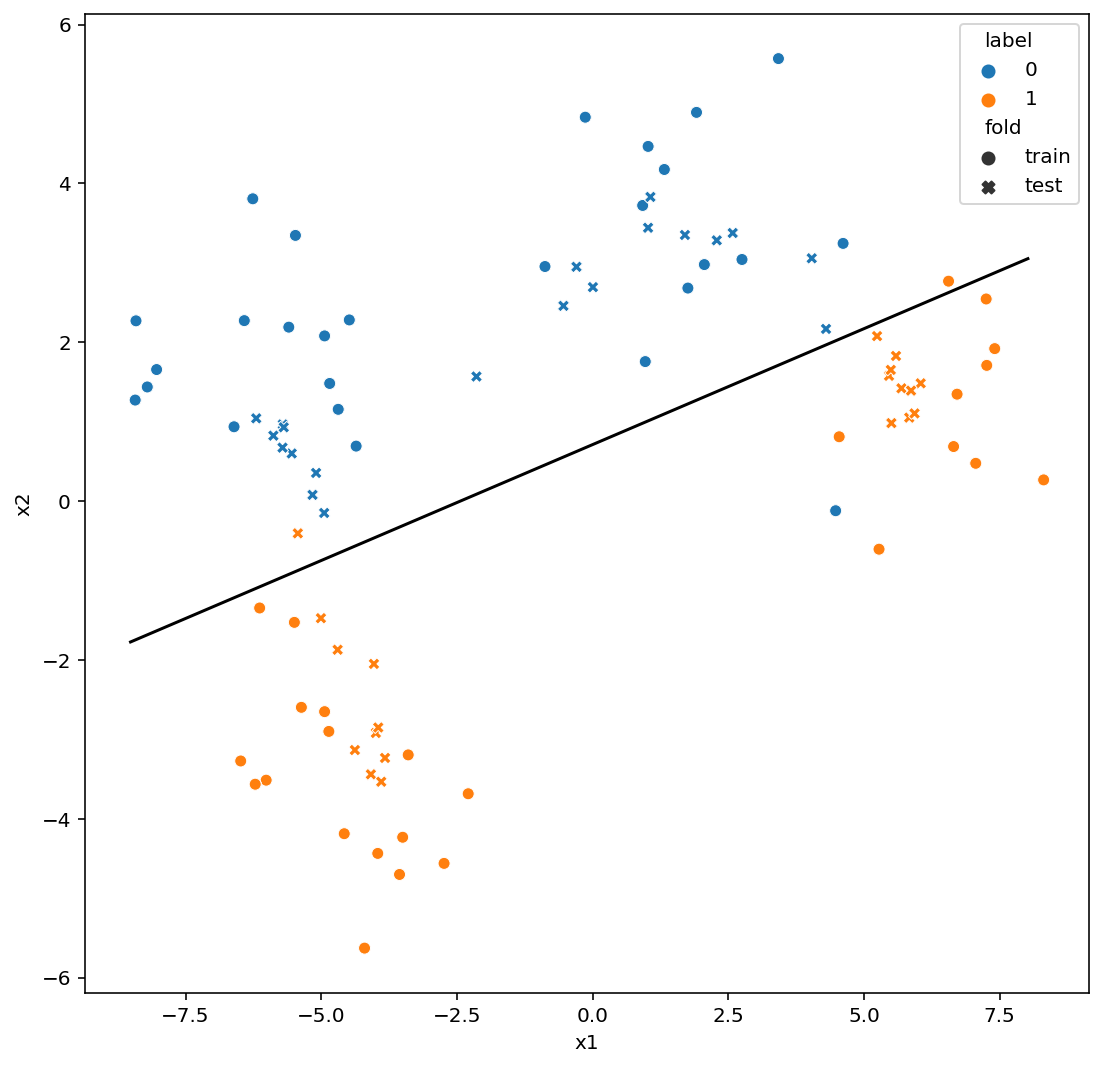

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.scatterplot(ax=ax, data=df_trm, x='x1', y='x2', hue='label', style='fold')
xlim = ax.get_xlim(); ylim = ax.get_ylim()# , ax.legend(handles=ax.get_legend().legendHandles, loc='lower right')
_ = plot_line(ax, xlim, svc.coef_[0], svc.intercept_)

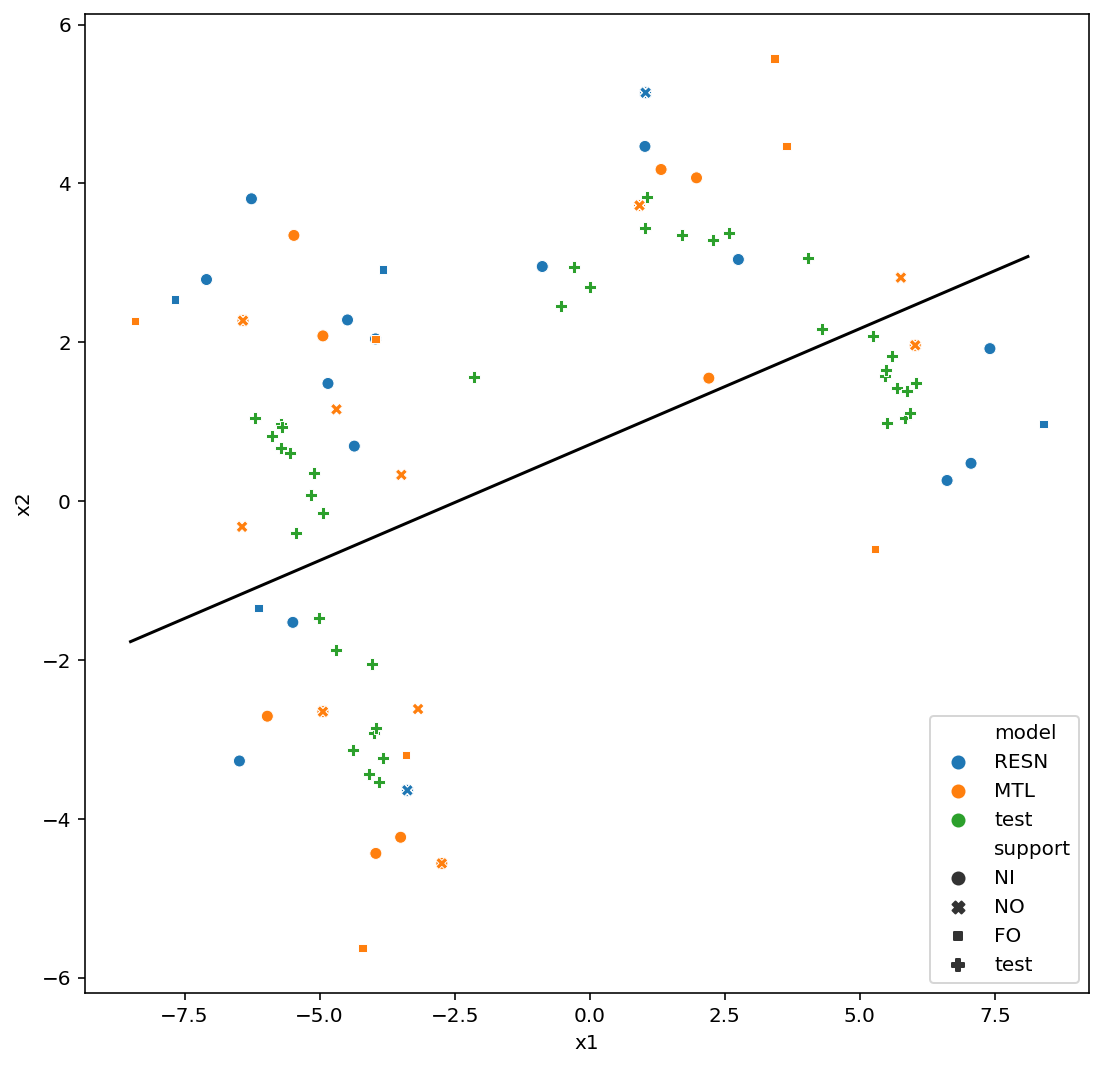

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.scatterplot(ax=ax, data=df_trm, x='x1', y='x2', hue='model', style='support')
ax.legend(handles=ax.get_legend().legendHandles, loc='lower right')
_ = plot_line(ax, xlim, svc.coef_[0], svc.intercept_)

In [52]:
from collections import defaultdict
import string
alphabet = np.array(list(string.ascii_lowercase))
math_text = lambda i: f'${i}$'
math_bf = lambda i: '${\\bf ' + str(i) + '}$'
# math_bf = lambda i: '${\\bf ' + alphabet.take(i) + '}$'

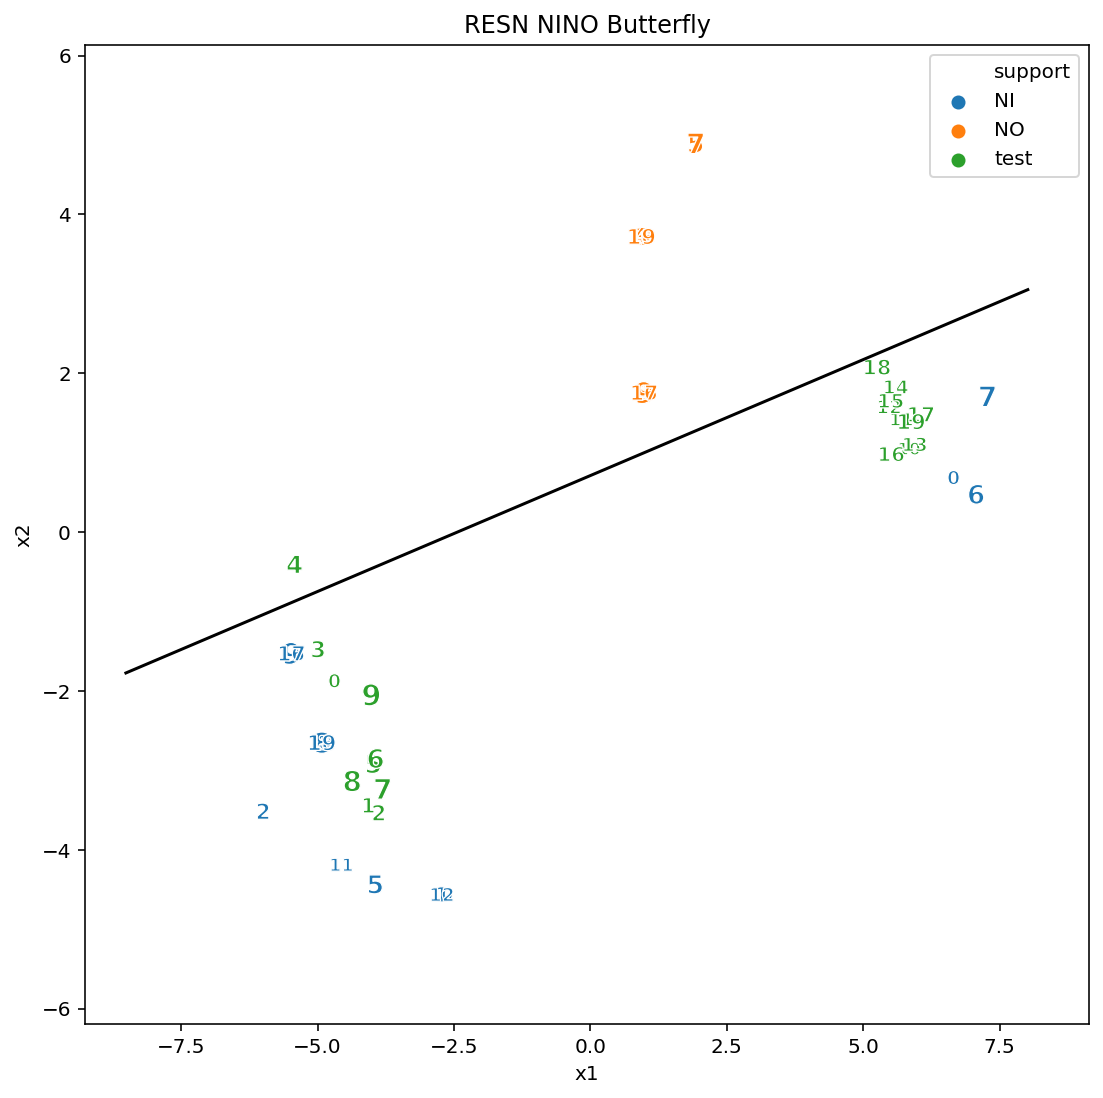

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
df = df_trm[df_trm['model'].isin(['RESN', 'test']) & df_trm['support'].isin(['NI', 'NO', 'test']) \
    & df_trm['test_id'].isin(range(20, 40))].copy(); df['test_id'] = df['test_id'] - 20
sns.scatterplot(ax=ax, data=df, x='x1', y='x2', hue='support', style='test_id', 
    markers={i: math_bf(i) for i in df['test_id']}, size='test_id', sizes=(50, 200))
ax.set_title('RESN NINO Butterfly'), ax.legend(handles=ax.get_legend().legendHandles[:4]), ax.set_xlim(xlim), ax.set_ylim(ylim)
_ = plot_line(ax, xlim, svc.coef_[0], svc.intercept_)

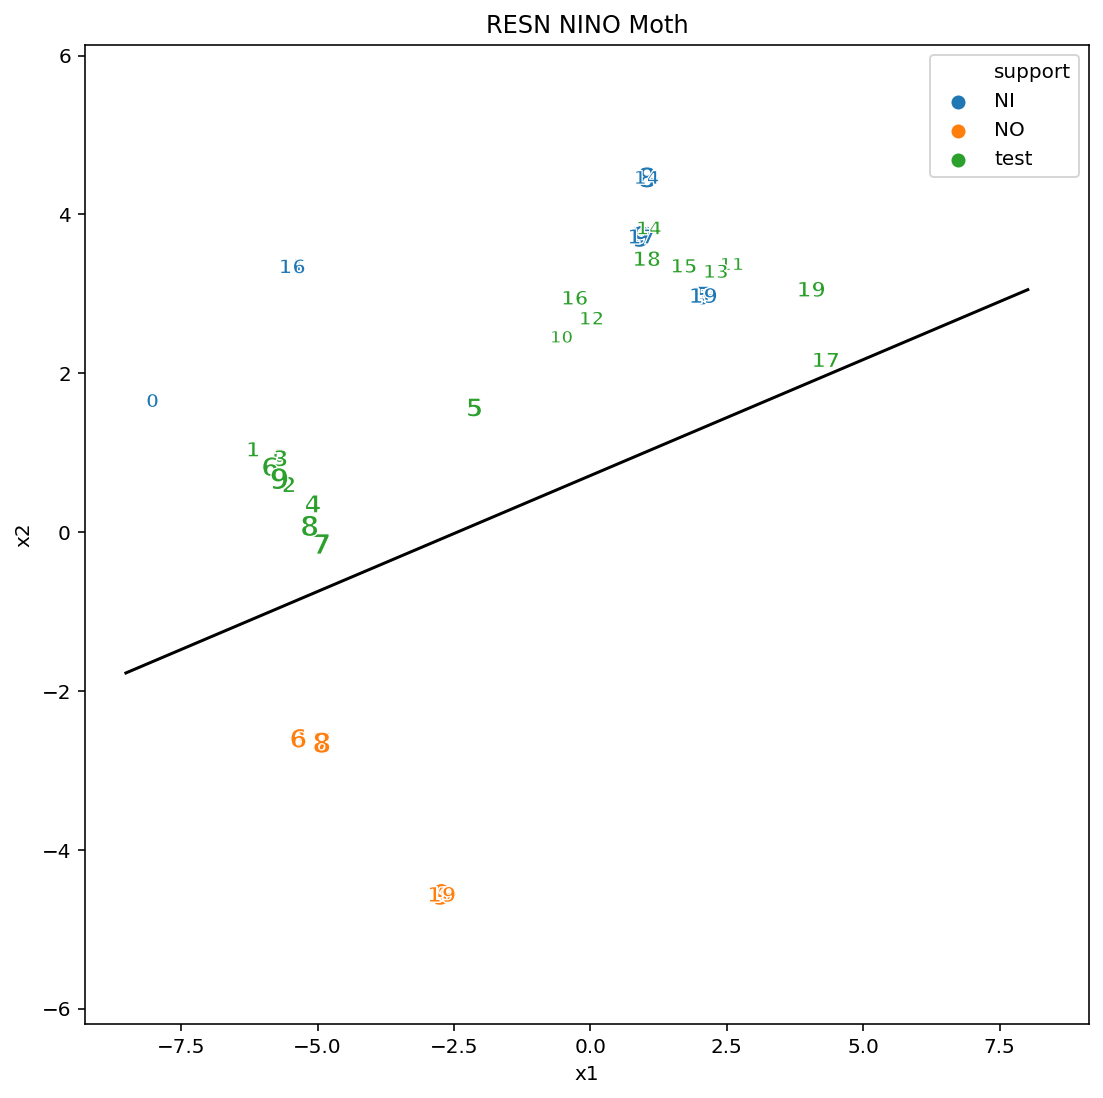

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
df = df_trm[df_trm['model'].isin(['RESN', 'test']) & df_trm['support'].isin(['NI', 'NO', 'test']) & df_trm['test_id'].isin(range(20))]
sns.scatterplot(ax=ax, data=df, x='x1', y='x2', hue='support', style='test_id', 
    markers={i: math_bf(i) for i in range(40)}, size='test_id', sizes=(50, 200))
ax.set_title('RESN NINO Moth'), ax.legend(handles=ax.get_legend().legendHandles[:4]), ax.set_xlim(xlim), ax.set_ylim(ylim)
_ = plot_line(ax, xlim, svc.coef_[0], svc.intercept_)

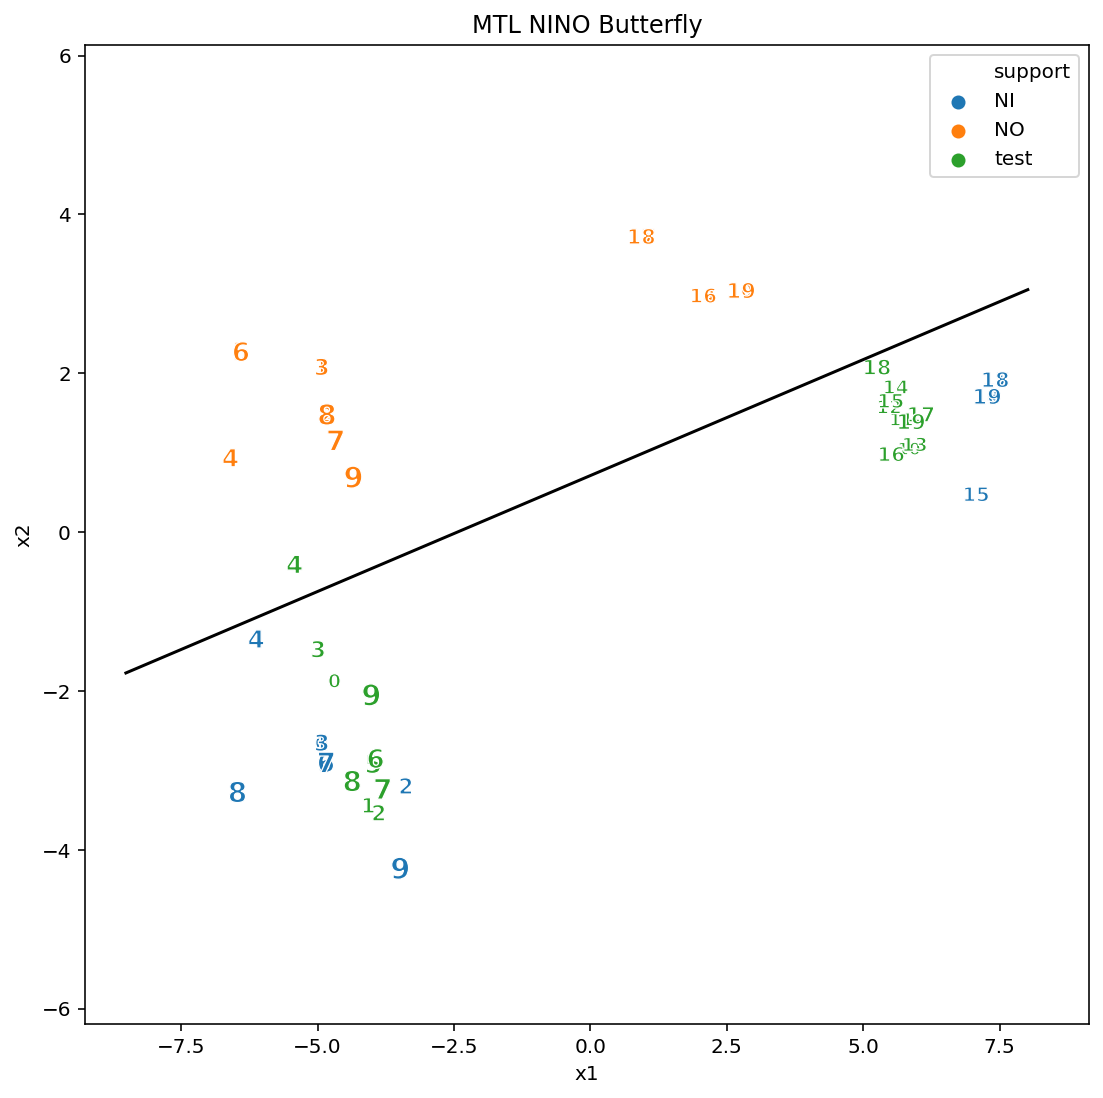

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
df = df_trm[df_trm['model'].isin(['MTL', 'test']) & df_trm['support'].isin(['NI', 'NO', 'test']) \
    & df_trm['test_id'].isin(range(20, 40))].copy(); df['test_id'] -= 20
sns.scatterplot(ax=ax, data=df, x='x1', y='x2', hue='support', style='test_id', 
    markers={i: math_bf(i) for i in range(40)}, size='test_id', sizes=(50, 200))
ax.set_title('MTL NINO Butterfly'), ax.legend(handles=ax.get_legend().legendHandles[:4]), ax.set_xlim(xlim), ax.set_ylim(ylim)
_ = plot_line(ax, xlim, svc.coef_[0], svc.intercept_)

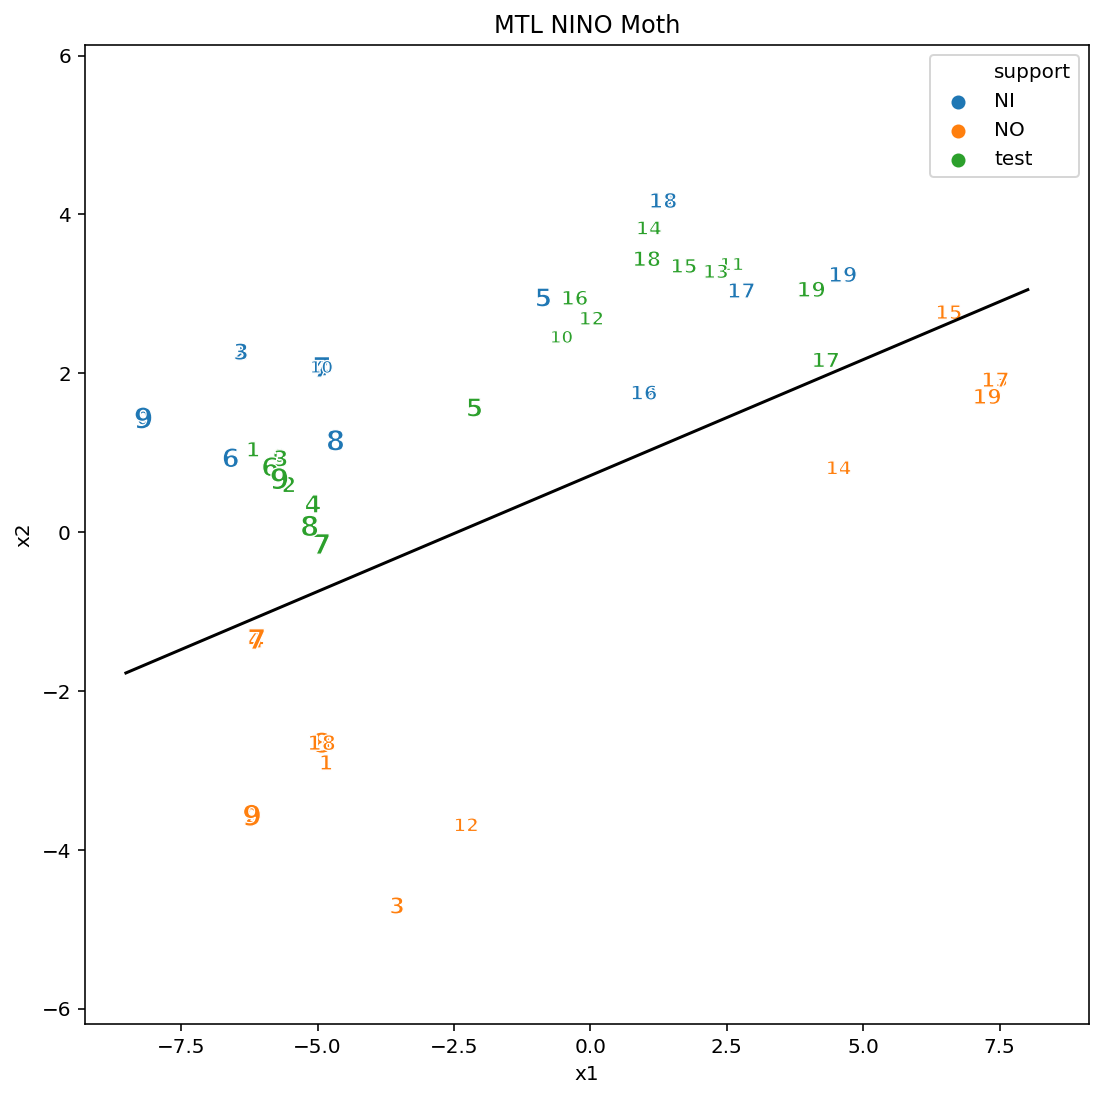

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
df = df_trm[df_trm['model'].isin(['MTL', 'test']) & df_trm['support'].isin(['NI', 'NO', 'test']) & df_trm['test_id'].isin(range(20))]
sns.scatterplot(ax=ax, data=df, x='x1', y='x2', hue='support', style='test_id', 
    markers={i: math_bf(i) for i in range(40)}, size='test_id', sizes=(50, 200))
ax.set_title('MTL NINO Moth'), ax.legend(handles=ax.get_legend().legendHandles[:4]), ax.set_xlim(xlim), ax.set_ylim(ylim)
_ = plot_line(ax, xlim, svc.coef_[0], svc.intercept_)